In [1]:
import numpy as np
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import *
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
#Setting Up GPU Growth. Helps getting rid of out of memory errors
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs available: ", len(physical_devices))
for gpu in physical_devices:
    tf.config.experimental.set_memory_growth(gpu, True)

Num GPUs available:  0


In [3]:
#Creating the Network
embedding_network=Sequential([
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer='he_uniform',padding="same", input_shape=(28,28,1)), #32x32x32
    MaxPool2D(pool_size=(3,3),strides=1), #16x16x32
    BatchNormalization(),
    Conv2D(filters=128,kernel_size=(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"), #16x16x64
    MaxPool2D(pool_size=(3,3),strides=2), #8x8x64
    Conv2D(filters=64,kernel_size=(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"),#8x8x64
    MaxPool2D(pool_size=(2,2),strides=2), #4x4x128
    Conv2D(filters=32,kernel_size=(3,3),activation="relu",kernel_initializer='he_uniform',padding="same"),#8x8x64
    MaxPool2D(pool_size=(2,2),strides=2), #4x4x128
    Flatten(),
    BatchNormalization(),
    Dense(units=2,activation="tanh"),
])

embedding_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                             
                                                        

In [4]:
"""path='Weights_folder/Weights_model'
embedding_network.load_weights(path)"""

"path='Weights_folder/Weights_model'\nembedding_network.load_weights(path)"

In [5]:
embed=load_model('embed.h5')

In [6]:
with open('data.npy', 'rb') as f:
    data = np.load(f)
with open('data_sorted.npy', 'rb') as f:
    data_sort = np.load(f)
with open('train_loss.npy', 'rb') as f:
    train_loss = np.load(f)
with open('train_acc.npy', 'rb') as f:
    train_acc = np.load(f)
with open('val_loss.npy', 'rb') as f:
    val_loss = np.load(f)
with open('val_acc.npy', 'rb') as f:
    val_acc = np.load(f)

In [7]:
print(data.shape)
data=np.reshape(data,(-1,28,28,1))
label=embed.predict(x=data)
#label=embedding_network.predict(x=data)

(70000, 28, 28)
2188/2188 [==============================] - 27s 12ms/step


In [8]:
def embedd(dat):
    ll=[]
    for i in range(7):
        k=np.array(dat[i])
        k=np.reshape(k,(-1,28,28,1))
        l=embed.predict(x=k)
        #l=embedding_network.predict(x=k)
        ll.append(l)
    return np.array(ll)

In [9]:
data_sort.shape

(7, 14000, 28, 28)

In [10]:
label_sort=embedd(data_sort)
label_sort.shape

438/438 [==============================] - 5s 12ms/step


(7, 14000, 2)

In [11]:
def centroid(tmp):
    a,b=sum(tmp[:,0])/len(tmp),sum(tmp[:,1])/len(tmp)
    k=np.zeros(2)
    k[0]=a
    k[1]=b
    return(k)

In [12]:
def create_centroid(lab):
    p=[]
    for i in range (len(lab)):
        p.append(centroid(lab[i]))
    return np.array(p)

In [13]:
cen=create_centroid(label_sort)

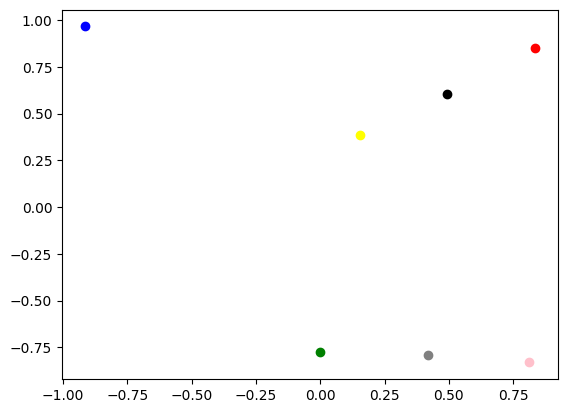

In [14]:
plt.scatter(cen[0,0],cen[0,1],color='green')
plt.scatter(cen[1,0],cen[1,1],color='blue')
plt.scatter(cen[2,0],cen[2,1],color='red')
plt.scatter(cen[3,0],cen[3,1],color='yellow')
plt.scatter(cen[4,0],cen[4,1],color='pink')
plt.scatter(cen[5,0],cen[5,1],color='black')
plt.scatter(cen[6,0],cen[6,1],color='grey')
plt.show()

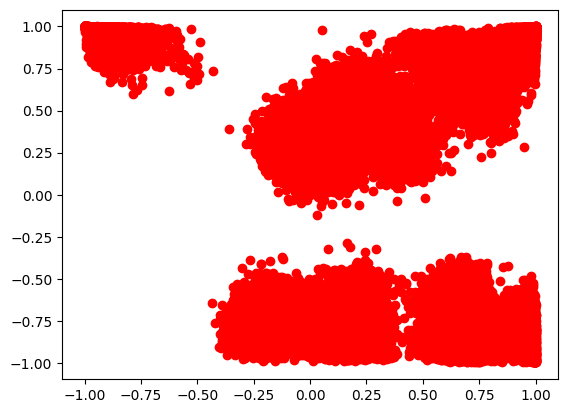

In [15]:
plt.scatter(label[:,0],label[:,1],color='red')
plt.show()

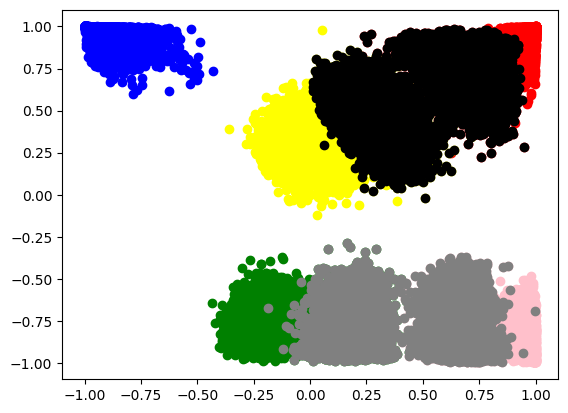

In [16]:
plt.scatter(label_sort[0][:,0],label_sort[0][:,1],color='green')
plt.scatter(label_sort[1][:,0],label_sort[1][:,1],color='blue')
plt.scatter(label_sort[2][:,0],label_sort[2][:,1],color='red')
plt.scatter(label_sort[3][:,0],label_sort[3][:,1],color='yellow')
plt.scatter(label_sort[4][:,0],label_sort[4][:,1],color='pink')
plt.scatter(label_sort[5][:,0],label_sort[5][:,1],color='black')
plt.scatter(label_sort[6][:,0],label_sort[6][:,1],color='grey')
plt.show()

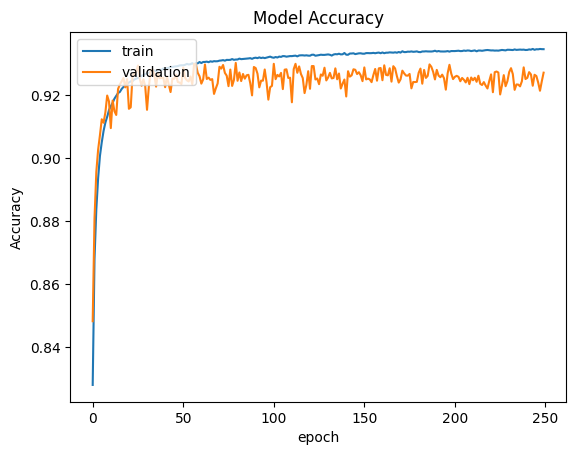

In [17]:
plt.plot(train_acc)
plt.plot(val_acc)
plt.legend(["train", "validation"], loc="upper left")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.show()

In [18]:
"""Group 0-> T-shirt/top(0),Trouser(1) 
   Group 1-> Pullover(2), dress(3),
   Group 2-> coat(4), sandal(5)
   Group 3-> shirt(6),sneaker(7),
   Group 4-> bag(8), Ankle boot(9)
   Group 5-> coat(4), Sneaker(7)
   Group 6-> Trouser(1), Ankle boot(9)"""

'Group 0-> T-shirt/top(0),Trouser(1) \n   Group 1-> Pullover(2), dress(3),\n   Group 2-> coat(4), sandal(5)\n   Group 3-> shirt(6),sneaker(7),\n   Group 4-> bag(8), Ankle boot(9)\n   Group 5-> coat(4), Sneaker(7)\n   Group 6-> Trouser(1), Ankle boot(9)'

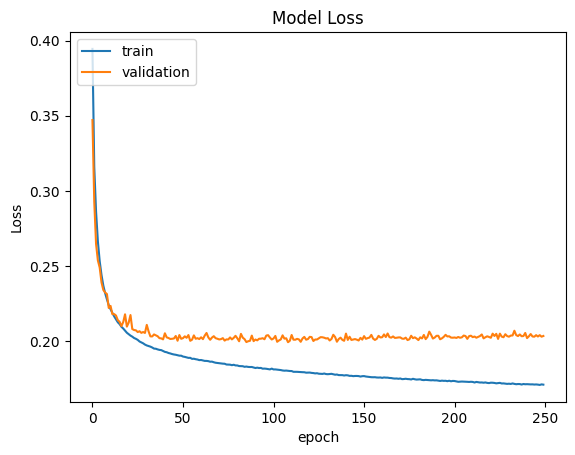

In [19]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(["train", "validation"], loc="upper left")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.show()

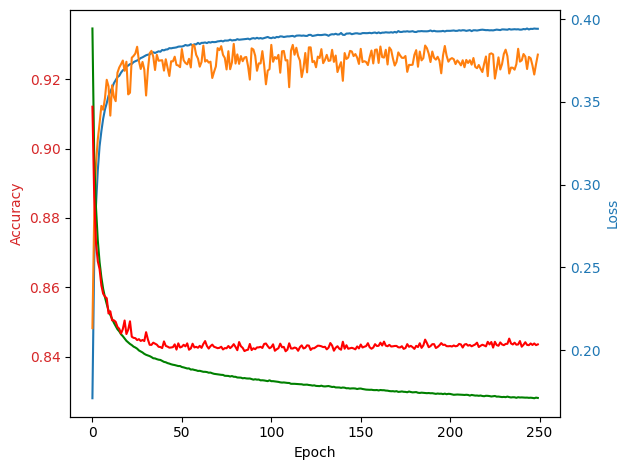

In [20]:
# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy', color=color)
ax1.plot(train_acc)#, color='red')
ax1.plot(val_acc)#, color='blue')
#plt.legend(["Train Accuracy", "Validation Accuracy"], loc="center")
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Loss', color=color)  # we already handled the x-label with ax1
ax2.plot(train_loss, color='green')
ax2.plot(val_loss, color='red')
#plt.legend(["Train Loss", "Validation Loss"], loc='right')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()